# **Forecasting Carbon Allowance Prices Across Five Emissions Trading Systems Using Deep Learning (2017-2023)**
| <H1>MScFE 690: Capstone</H1><H2><i>Final Project</i> - Student Group 5481</H2> | <img src="https://learn.wqu.edu/assets/39cecb6f6bdccec67223.svg" alt="WQU">               |
|:-------------|--------------------:|

|        FULL LEGAL NAME       |  LOCATION |           EMAIL ADDRESS          | CONTRIBUTING |
|:----------------------------:|:-------------------:|:--------------------------------:|:--------------------------------------:|
| Artis Jhamar Johnson | USA               | jammervp@gmail.com          |                                        |
| Pranav Ramkumar          | USA              | pranavramkumar@gmail.com             |                                        |
| Ekoue Jean Kougnah        | Togo               | kougnahe@gmail.com |                                        |

<h3>Statement of integrity:</h3>

| Team member | By typing the names of all group members in the text boxes below,<br> you confirm that the assignment submitted is original work produced by the group<br> (excluding any non-contributing members identified with an “X” above).               |
|:-------------|:--------------------:|
| A | Artis Jhamar Johnson |
| B | Pranav Ramkumar            |
| C | Ekoue Jean Kougnah               |

# Import Required Libraries

In [1]:
# Import Other Required Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y-%m-%d')

from google.colab import drive
from datetime import datetime as dt
#import sys
#drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

# Diagnostic plots to explore the distribution of the feature space

## Sample: For Regional Greenhouse Gas Initiative


In [6]:
# Load data
df = pd.read_csv('RGGI.csv')

In [7]:
# Create a dictionary using only the header rows
df_dict = df[0:6]
df_dict = df_dict.T
df_dict.columns = df_dict.iloc[0]
df_dict = df_dict[1:]
df_dict = df_dict[['Date', 'Units']]
df_dict.rename(columns={'Date': 'ColName'}, inplace=True)
df_dict

Factor,ColName,Units
Y,Allowance Price,USD / ton
B0,Compliance Period Identifier,NaN
X1,Compliance Period Identifier (Encoded),NaN
X2,Market Stability Action,tCO2e
X3,Number of new free allowances Introduced,#
...,...,...
A46,Recession Indicator,binary
X11,Other Carbon tax,#
X12,Number of extreme climate events during the pe...,#
X13,Average Global Temperature Anomaly in Celsius,degC


In [8]:
df.drop(df.index[0:6], inplace=True)
df = df[['Factor', 'Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14']]
df.rename(columns={'Factor': 'Date'}, inplace=True)
df.set_index('Date', inplace=True)
df

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
Date,,,,,,,,,,,,,,,
2017-01-01,3.45,3,0,"1,683,070","14,791,315",4,"32,000,000","84,344,203","2,162,672",0.51,"72,482",1,0,1.05,55.00
2017-01-02,3.45,3,0,"1,683,070","14,791,315",4,"32,000,000","84,344,203","2,162,672",0.51,"72,482",1,0,1.05,55.00
2017-01-03,3.45,3,0,"1,683,070","14,791,315",4,"32,000,000","84,344,203","2,162,672",0.51,"72,482",1,0,1.05,55.00
2017-01-04,3.45,3,0,"1,683,070","14,791,315",4,"32,000,000","84,344,203","2,162,672",0.50,"72,482",1,0,1.05,55.00
2017-01-05,3.45,3,0,"1,683,070","14,791,315",4,"32,000,000","84,344,203","2,162,672",0.50,"72,482",1,0,1.05,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,16.40,5,0,"969,685","27,656,000",4,"255,000,000","112,457,784","3,655,000",0.96,"98,589",2,0,1.38,275.11
2023-12-28,16.40,5,0,"969,685","27,656,000",4,"255,000,000","112,457,784","3,655,000",0.96,"98,589",2,0,1.38,275.11
2023-12-29,16.40,5,0,"969,685","27,656,000",4,"255,000,000","112,457,784","3,655,000",0.96,"98,589",2,0,1.38,275.11


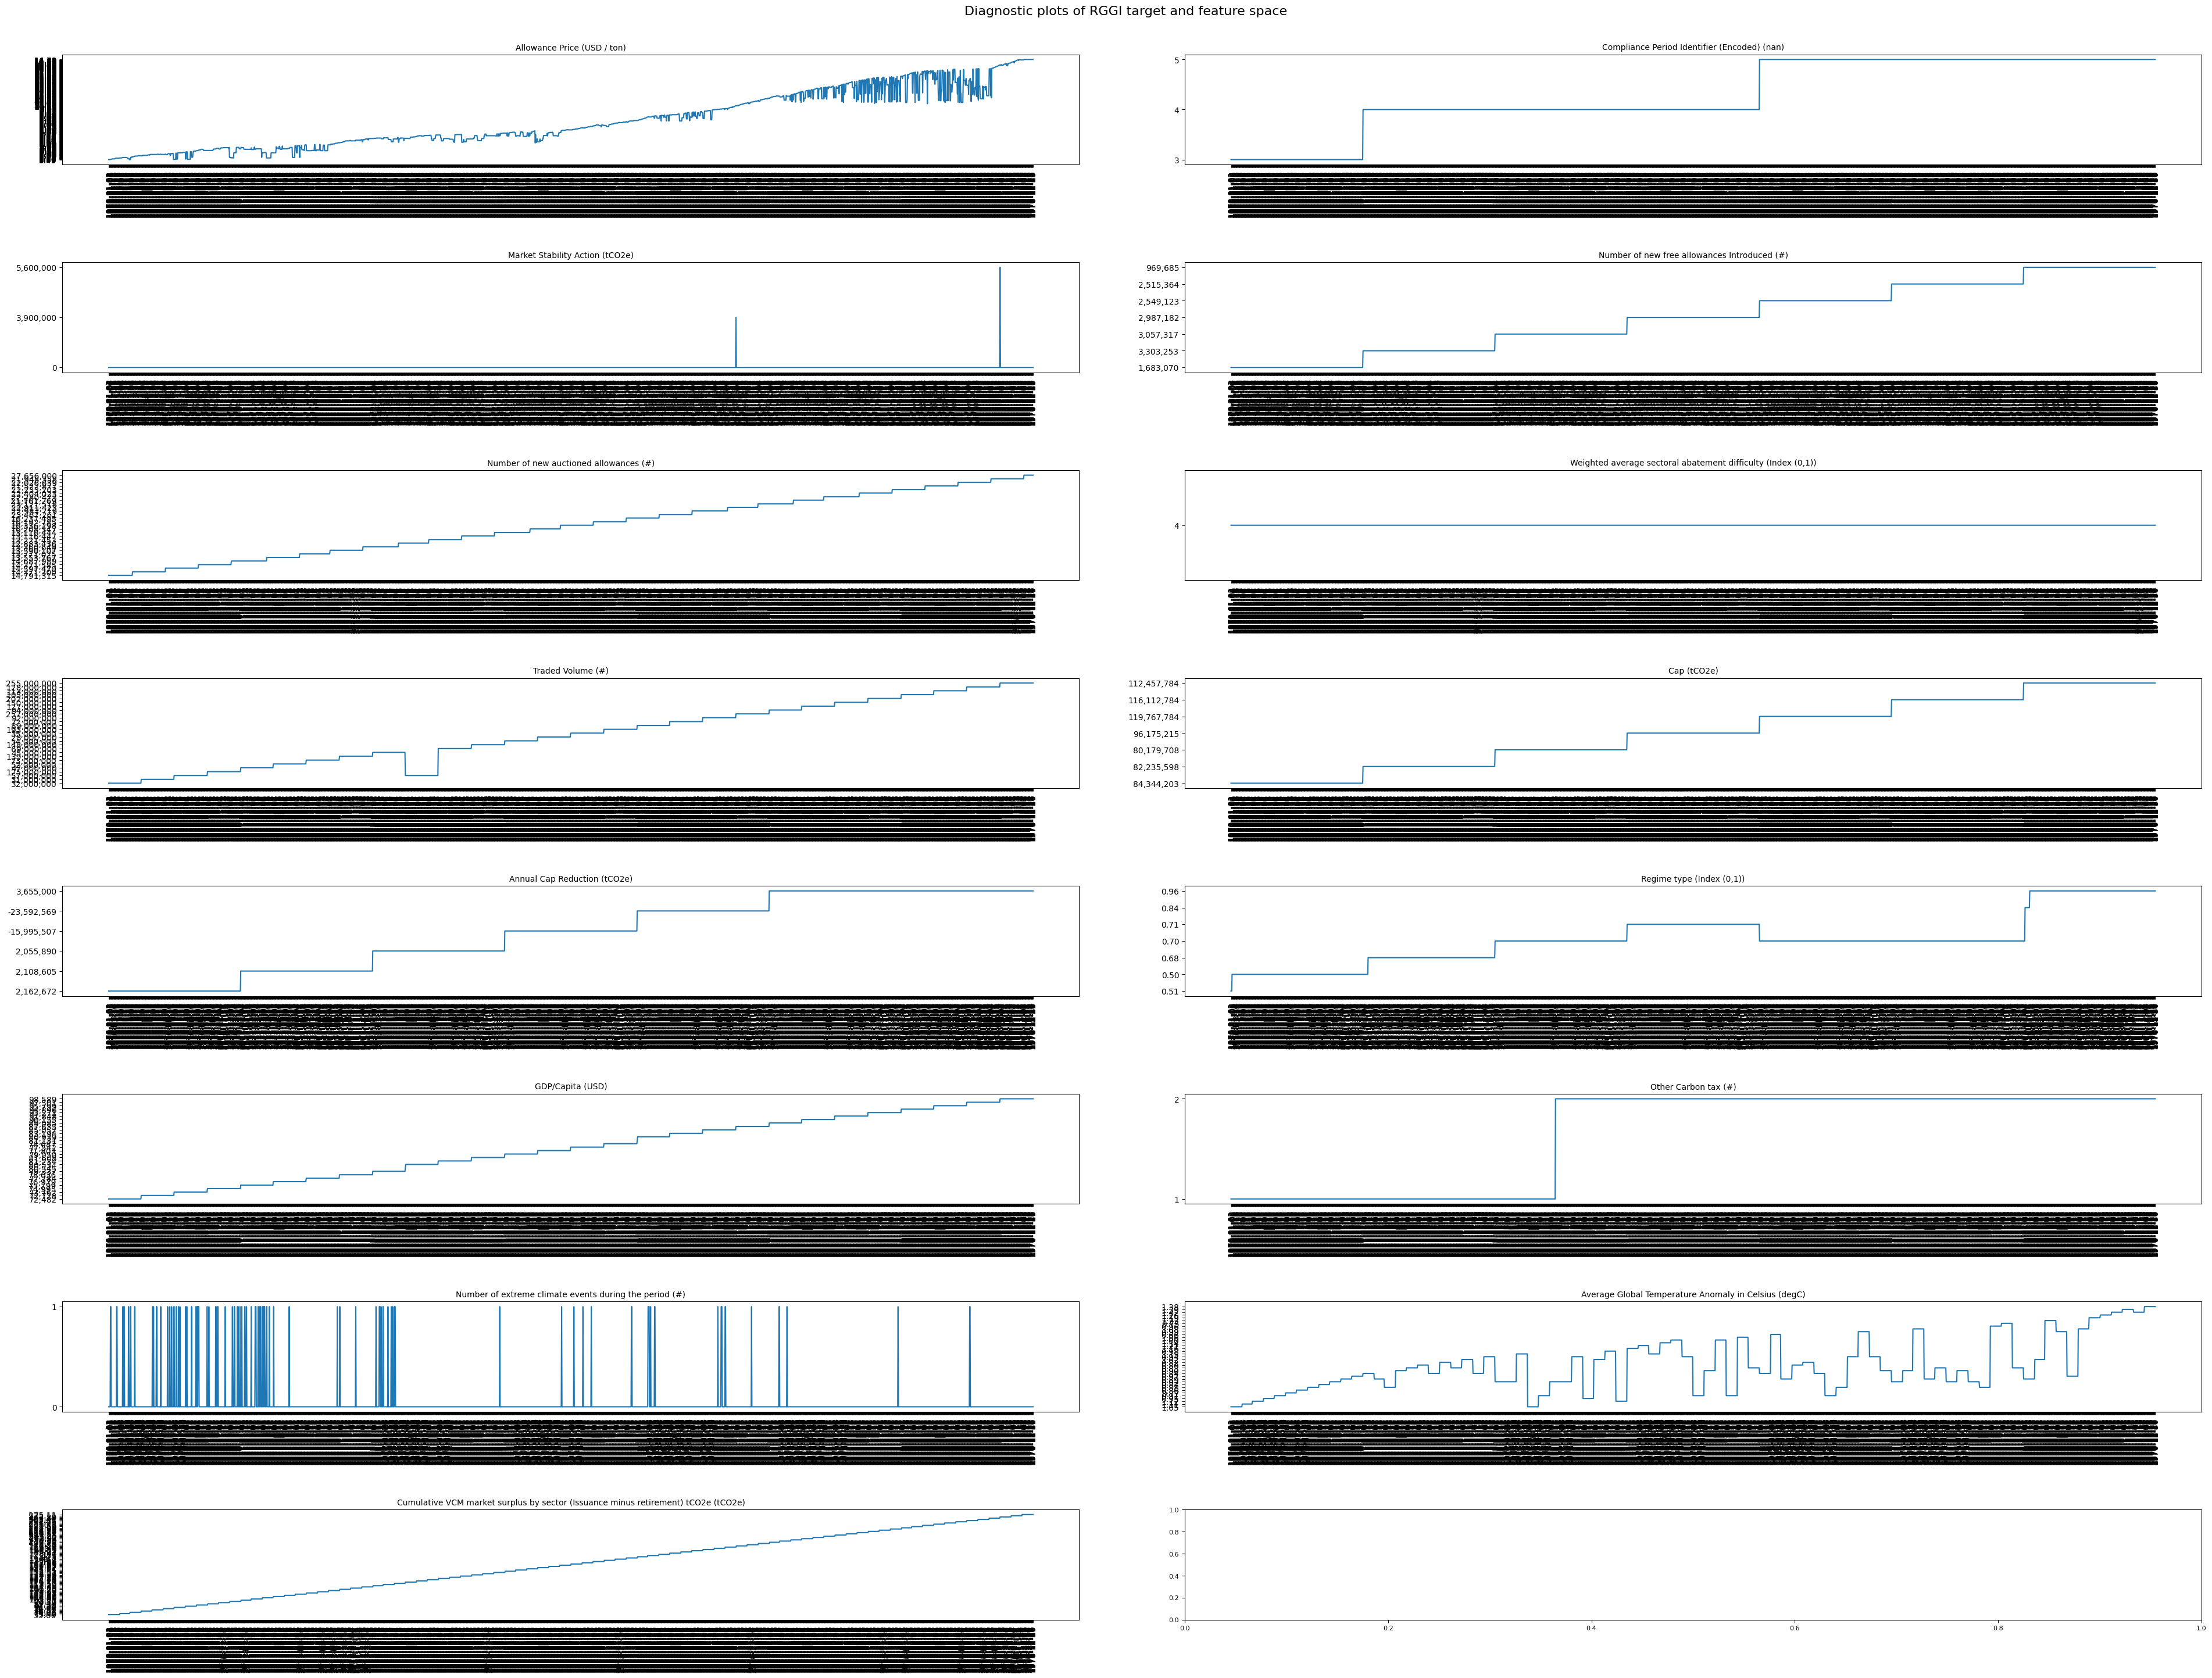

In [19]:
# Diagnostic plots of RGGI target and feature space
fig, axs = plt.subplots(8, 2, figsize=(40, 30))
fig.tight_layout(pad=10.0)
axs = axs.ravel()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

for col in df.columns:
    axs[df.columns.get_loc(col)].plot(df[col])
    axs[df.columns.get_loc(col)].set_title(str(df_dict.loc[col,'ColName'])+' ('+str(df_dict.loc[col,'Units'])+')', fontsize=10)
    axs[df.columns.get_loc(col)].set_xticklabels(df.index, rotation=90)
    axs[df.columns.get_loc(col)].xaxis.set_major_formatter(myFmt)
plt.suptitle('Diagnostic plots of RGGI target and feature space', fontsize=16)
plt.show()

As observed from the diagnostic plots above, we can see that most features are not stationary or linear, and hence warrants the use of statistical techniques such as mode decomposition, and forecasting methods such as the use of ML models which capture non-stationarity and nonlinearity of variable interactions.